In [1]:
import os
import sys
import random
import skimage.io
from mrcnn.config import Config
from datetime import datetime 
# Root directory of the project
ROOT_DIR = os.getcwd()
 
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Directory to save logs and trained model

ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "Mask_RCNN/logs")
print(ROOT_DIR,MODEL_DIR)

/home/zkl/zklcode/code/helmet/123123/Mask_RCNN /home/zkl/zklcode/code/helmet/123123/Mask_RCNN/Mask_RCNN/logs


Using TensorFlow backend.


In [3]:
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(MODEL_DIR +'/shapes20181219T1210/',"mask_rcnn_shapes_0010.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
imgpath = '../helmat/helmat/dataset/pic/'
IMAGE_DIR = os.path.join(ROOT_DIR, imgpath)

IMAGE_DIR = '/home/zkl/zklcode/code/helmet/123123/helmat/helmat/dataset/pic/'
print(IMAGE_DIR)
class_names = ['BG', 'helmat']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

print(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

/home/zkl/zklcode/code/helmet/123123/helmat/helmat/dataset/pic/
['1.jpg', '00106.jpg', '001.jpg', '10.jpg', '100.jpg', '00108.jpg', '102.jpg', '00101.jpg', '0011.jpg', '00107.jpg', '00102.jpg', '00104.jpg', '105.jpg', '00100.jpg', '00103.jpg', '109.jpg', '0010.jpg', '107.jpg', '101.jpg', '0.jpg', '000.jpg', '00105.jpg', '108.jpg', '104.jpg', '106.jpg']


In [4]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"
 
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 3 shapes
 
    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 384
 
    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)  # anchor side in pixels
 
    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE =100
 
    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100
 
    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 50
 
#import train_tongue
#class InferenceConfig(coco.CocoConfig):
class InferenceConfig(ShapesConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
config = InferenceConfig()

In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
 
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Re-starting from epoch 10


Processing 1 images
image                    shape: (500, 346, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  500.00000  float64
anchors                  shape: (1, 36828, 4)         min:   -1.41791  max:    2.25080  float32
shijian 0


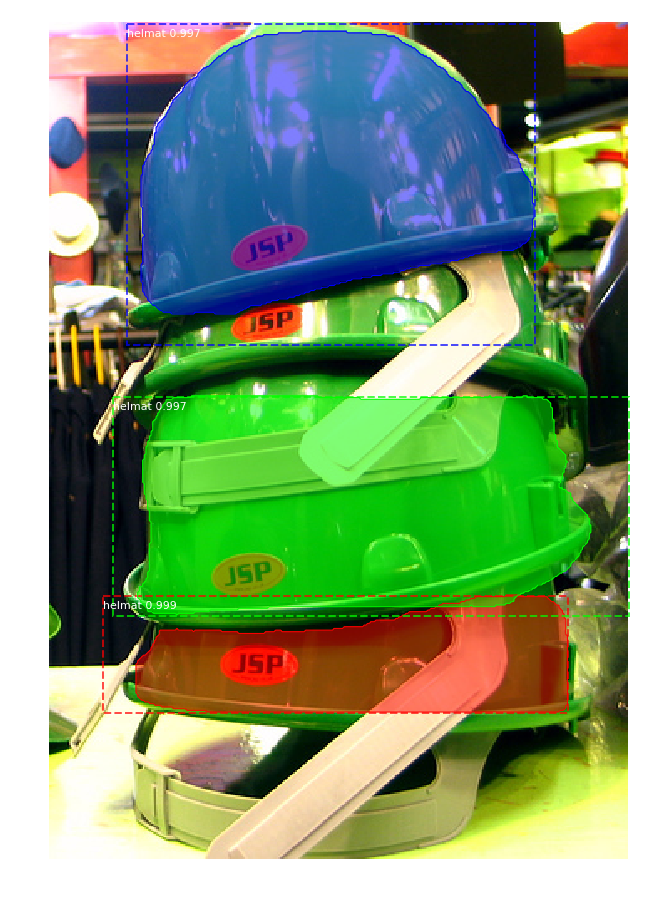

In [8]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

a=datetime.now() 
# Run detection
results = model.detect([image], verbose=1)
b=datetime.now() 
# Visualize results
print("shijian",(b-a).seconds)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [9]:
COCO_MODEL_PATH

'/home/zkl/zklcode/code/helmet/123123/Mask_RCNN/Mask_RCNN/logs/shapes20181219T1210/mask_rcnn_shapes_0010.h5'

In [ ]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'helmat']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
 
a=datetime.now() 
# Run detection
results = model.detect([image], verbose=1)
b=datetime.now() 
# Visualize results
print("shijian",(b-a).seconds)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
